# Frequency De-mixer: 'Unwanted Solo'

In [15]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

- Analyzing the Frequency Charateristics of the audio file

Sample Rate: 48000 Hz
Duration: 15.00 seconds


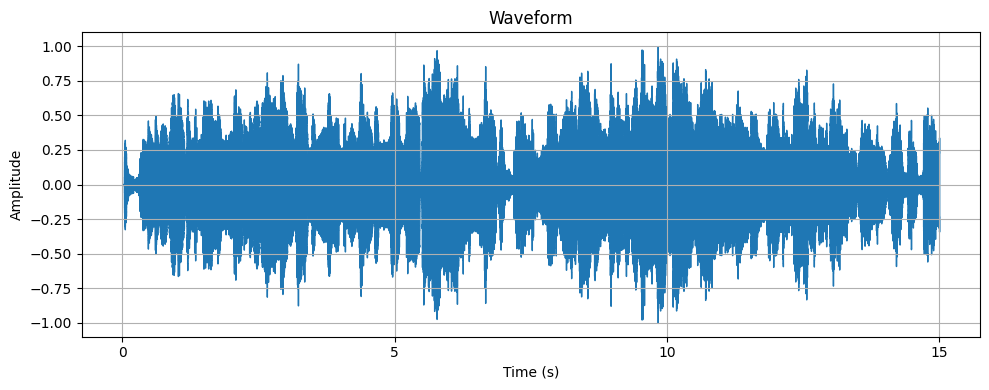

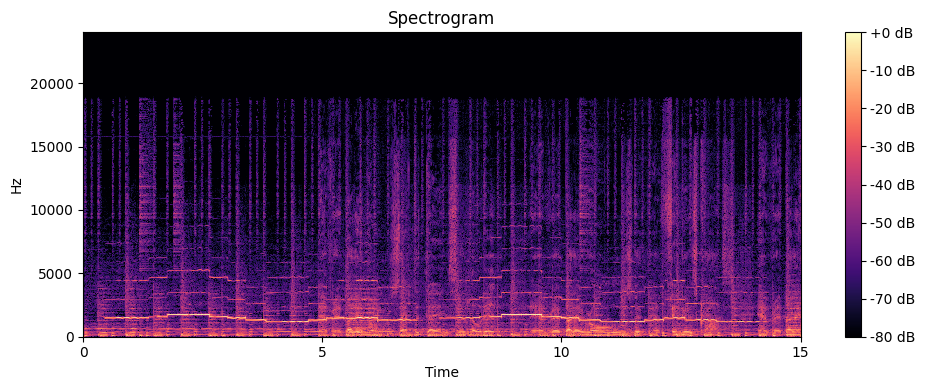

Text(0, 0.5, 'Amplitude')

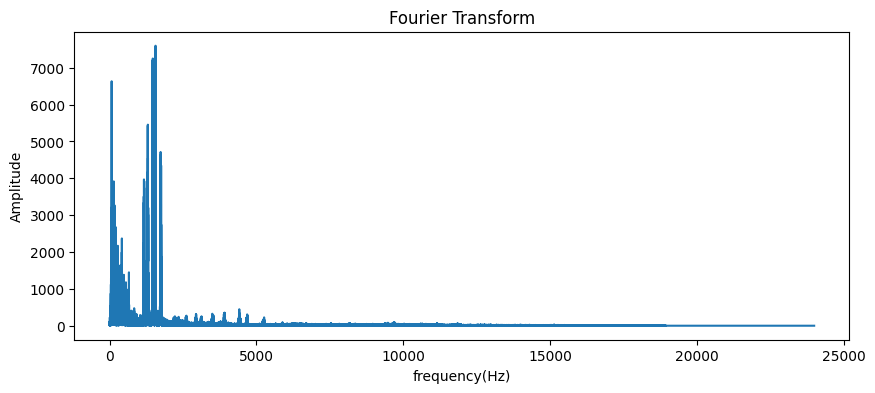

In [44]:
#Loading the audio file
audio_path = "song_with_2piccolo.wav"
y, sr = librosa.load(audio_path, sr=None) # sr - sampling rate
print(f"Sample Rate: {sr} Hz")
print(f"Duration: {len(y) / sr:.2f} seconds")

y_normalized = y / np.max(np.abs(y))

#Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_normalized, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot the spectrogram (in dB)
D = librosa.stft(y) #short-time fourier transform
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

#Fourier Transform
n = len(y)
Y = np.fft.fft(y) 
freqs = np.fft.fftfreq(n, d=1/sr) #creating frequency bins for plotting

plt.figure(figsize=(10,4))
plt.plot(freqs[:len(freqs)//2],np.abs(Y)[:len(Y)//2])
plt.title("Fourier Transform")
plt.xlabel('frequency(Hz)')
plt.ylabel('Amplitude')


#### Filter Design